In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [124]:
df = pd.read_csv('amazon1.csv')
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,order_month,order_year,ship_month,ship_year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,May,2010,Jun,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,Aug,2012,Sep,2012
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,May,2014,May,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,Jun,2014,Jul,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,Feb,2013,Feb,2013


In [125]:
#Convert to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [126]:
# check for duplicates
df.duplicated().sum() 

0

In [127]:
#monthly rev

monthly_rev = df.groupby('order_month')['Total Revenue'].sum().reset_index()
monthly_rev

,order_month,Total Revenue
0,Apr,16187186.33
1,Aug,1128164.91
2,Dec,7249462.12
3,Feb,24740517.77
4,Jan,10482467.12
5,Jul,15669518.50
6,Jun,5230325.77
7,Mar,2274823.87
8,May,13215739.99
9,Nov,20568222.76


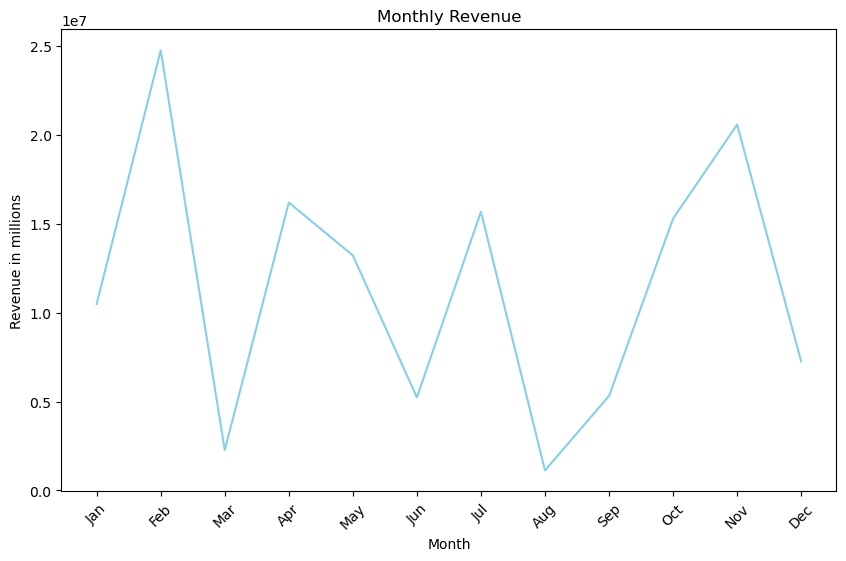

In [128]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'order_month' to a categorical type with the defined order
monthly_rev['order_month'] = pd.Categorical(monthly_rev['order_month'], categories=month_order, ordered=True)

# Sort the DataFrame by order_month
monthly_rev = monthly_rev.sort_values('order_month')

# Plot the data
plt.figure(figsize = (10,6))
sns.lineplot(data=monthly_rev, x='order_month', y='Total Revenue', color='skyblue')

plt.xlabel('Month')
plt.ylabel('Revenue in millions')
plt.title('Monthly Revenue')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)
plt.show()

In [129]:
# yearly rev change 
yearly_rev = df.groupby('order_year')['Total Revenue'].sum().reset_index()

yearly_rev['YoY Change (%)'] = yearly_rev['Total Revenue'].pct_change() * 100

print(yearly_rev)

   order_year  Total Revenue  YoY Change (%)
0        2010    19186024.92             NaN
1        2011    11129166.07      -41.993372
2        2012    31898644.52      186.622055
3        2013    20330448.66      -36.265478
4        2014    16630214.43      -18.200455
5        2015    12427982.86      -25.268655
6        2016    12372867.22       -0.443480
7        2017    13373419.63        8.086666


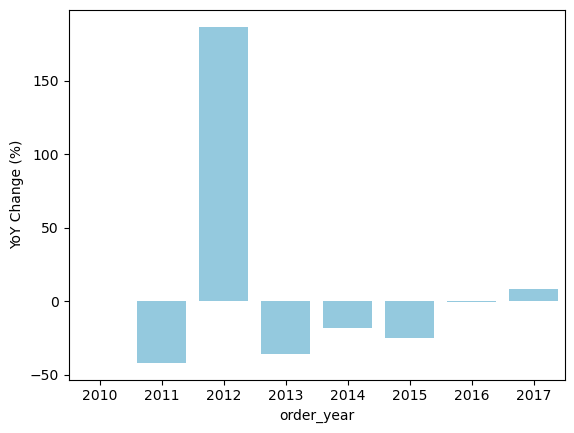

In [130]:
ax = sns.barplot(data = yearly_rev, x = 'order_year', y = 'YoY Change (%)', color ='skyblue')

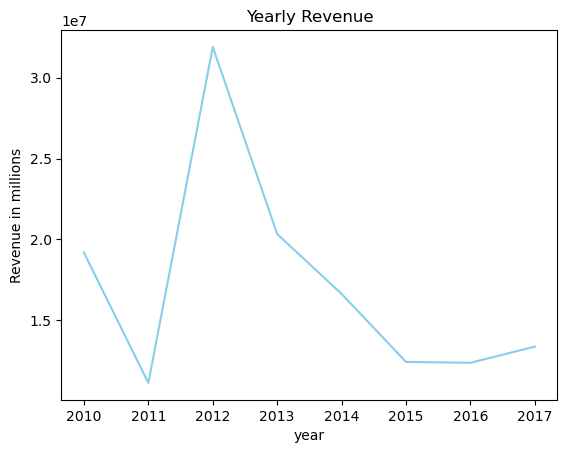

In [131]:
# yearly rev trend
ax = sns.lineplot(data = yearly_rev, x = 'order_year', y = 'Total Revenue', color ='skyblue')

plt.xlabel('year')
plt.ylabel('Revenue in millions')
plt.title('Yearly Revenue')


# Show the plot
plt.show()

In [132]:
#yrly profit
yearly_profit = df.groupby('order_year')['Total Profit'].sum().reset_index()
yearly_profit

,order_year,Total Profit
0,2010,6629567.43
1,2011,2741008.23
2,2012,9213010.12
3,2013,6715420.04
4,2014,5879461.68
5,2015,3996539.44
6,2016,4903838.01
7,2017,4089353.45


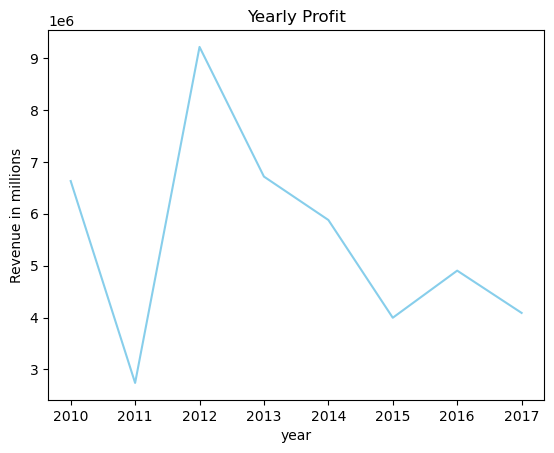

In [133]:
ax = sns.lineplot(data = yearly_profit, x = 'order_year', y = 'Total Profit', color ='skyblue')

plt.xlabel('year')
plt.ylabel('Revenue in millions')
plt.title('Yearly Profit')


# Show the plot
plt.show()

In [134]:
# which region generated the most rev?
df.groupby('Region')['Total Revenue'].sum().sort_values(ascending = False).head(1).index[0]

'Sub-Saharan Africa'

In [135]:
# which country generated the most rev?
df.groupby('Country')['Total Revenue'].sum().sort_values(ascending = False).head(1).index[0]

'Honduras'

In [216]:
# Which is the most popular item type?
df.groupby('Item Type')['Units Sold'].sum().sort_values(ascending = False)

Item Type
Cosmetics          83718
Clothes            71260
Beverages          56708
Fruits             49998
Personal Care      48708
Office Supplies    46967
Household          44727
Baby Food          40545
Cereal             25877
Vegetables         20051
Snacks             13637
Meat               10675
Name: Units Sold, dtype: int64

Cosmetics

In [137]:
#Are offline sales or online sales generating more profit overall?
df.groupby('Sales Channel')['Total Profit'].sum().sort_values(ascending = False)

Sales Channel
Offline    24920726.67
Online     19247471.73
Name: Total Profit, dtype: float64

offline is more profitable overall

In [138]:
# which is them most popular item in online sales channel
df[df['Sales Channel'] == 'Online'].groupby('Item Type')['Units Sold'].sum().sort_values(ascending = False)

Item Type
Cosmetics          41969
Fruits             36094
Clothes            30389
Office Supplies    26168
Cereal             22116
Baby Food          16447
Beverages          15120
Vegetables         14834
Snacks             13637
Meat               10675
Personal Care       8358
Household            282
Name: Units Sold, dtype: int64

Cosmetics followed by fruits and clothes.

In [209]:
# which is them most popular item in offline sales channel
df[df['Sales Channel'] == 'Offline'].groupby('Item Type')['Units Sold'].sum().sort_values(ascending = False)

Item Type
Household          44445
Cosmetics          41749
Beverages          41588
Clothes            40871
Personal Care      40350
Baby Food          24098
Office Supplies    20799
Fruits             13904
Vegetables          5217
Cereal              3761
Name: Units Sold, dtype: int64

This suggests that customers prefer to physically examine these products before making a purchase. Household items may involve larger or more complex products, making it important for customers to see them in person. Similarly, cosmetics and beverages are items where appearance, packaging, or quality can influence purchasing decisions, prompting buyers to inspect them physically.

In [140]:
# What are the top 5 best-selling item types based on total revenue?
df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending = False).head(5)

Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Name: Total Revenue, dtype: float64

In [141]:
# Which item type generates the highest profit margin (profit per unit sold)?
df.groupby('Item Type').apply(lambda x: x['Total Profit'].sum() / x['Units Sold'].sum(),include_groups=False).sort_values(ascending=False)


Item Type
Cosmetics          173.87
Household          165.73
Office Supplies    126.25
Baby Food           95.86
Cereal              88.59
Clothes             73.44
Vegetables          63.13
Meat                57.20
Snacks              55.14
Personal Care       25.06
Beverages           15.66
Fruits               2.41
dtype: float64

In [142]:
# Which sales channel has higher average units sold per order?
df.groupby('Sales Channel')['Units Sold'].mean().sort_values(ascending = False)

Sales Channel
Offline    5535.64
Online     4721.78
Name: Units Sold, dtype: float64

Offline channel have more avg units sold per order

In [143]:
# Do high-priority (Order Priority = 'H') orders generate more revenue or profit than lower-priority orders?
df.groupby('Order Priority')['Total Profit'].sum().sort_values(ascending = False)

Order Priority
H    16891599.58
L    10858727.86
M     9669542.50
C     6748328.46
Name: Total Profit, dtype: float64

Yes order with high priority generate more profit than others comparitively. 

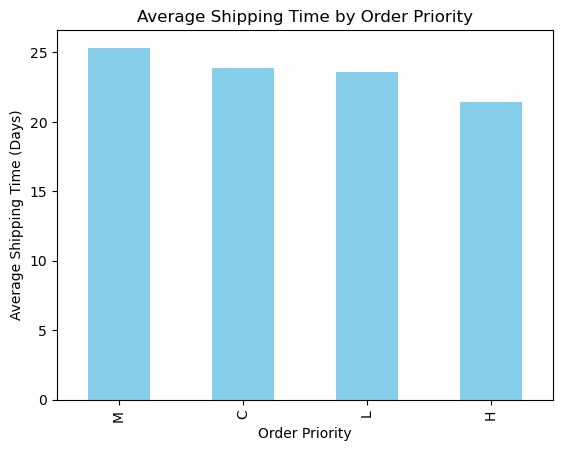

In [201]:
#Is there a trend in the shipping time based on order priority?
df['Shipping Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days
shipping_time_by_priority = df.groupby('Order Priority')['Shipping Time (Days)'].mean().sort_values(ascending = False)

#plotting graph
shipping_time_by_priority.plot(kind='bar', color='skyblue')
plt.title('Average Shipping Time by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Shipping Time (Days)')
plt.show()

High priority has comparitively lesser shipping time than low priority orders. Which is a good thing. 

In [145]:
# Which products have the largest gap between unit price and unit cost?
df['unitp_unitc_diff'] = df['Unit Price'] - df['Unit Cost']
df.groupby('Item Type')['unitp_unitc_diff'].max().sort_values(ascending = False)

Item Type
Cosmetics          173.87
Household          165.73
Office Supplies    126.25
Baby Food           95.86
Cereal              88.59
Clothes             73.44
Vegetables          63.13
Meat                57.20
Snacks              55.14
Personal Care       25.06
Beverages           15.66
Fruits               2.41
Name: unitp_unitc_diff, dtype: float64

In [146]:
# What is the average shipping time (difference between Order Date and Ship Date)?
(df['Ship Date'] - df['Order Date']).dt.days.mean()

23.36

In [147]:
# Are there regions with significantly longer shipping times?
df.groupby('Region')['Shipping Time (Days)'].mean().sort_values(ascending=False)

Region
Asia                                 28.727273
Central America and the Caribbean    26.714286
North America                        25.666667
Australia and Oceania                24.272727
Middle East and North Africa         24.200000
Europe                               24.136364
Sub-Saharan Africa                   19.888889
Name: Shipping Time (Days), dtype: float64

In [148]:
# Which countries are the most profitable?
df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).head(10)

Country
Djibouti       2425317.87
Myanmar        1802771.70
Pakistan       1719922.04
Samoa          1678540.98
Honduras       1609947.52
Iceland        1541705.29
Azerbaijan     1512926.83
Switzerland    1512729.45
Mexico         1457942.76
Rwanda         1417493.49
Name: Total Profit, dtype: float64

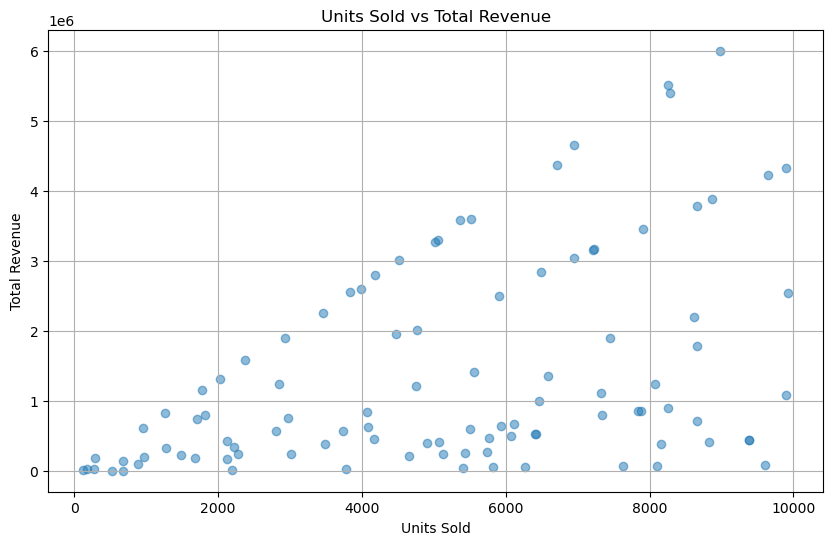

In [150]:
# What is the relationship between units sold and total revenue? Does higher units sold always result in higher revenue?
corr = df['Units Sold'].corr(df['Total Revenue'])
plt.figure(figsize=(10, 6))
plt.scatter(df['Units Sold'], df['Total Revenue'], alpha=0.5)
plt.title('Units Sold vs Total Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

Indicates a moderate positive relationship between Units Sold and Total Revenue

   Item Type  Unit Price  Units Sold
0  Baby Food      255.28       40545
2     Cereal      205.70       25877
6  Household      668.27       44727
7       Meat      421.89       10675


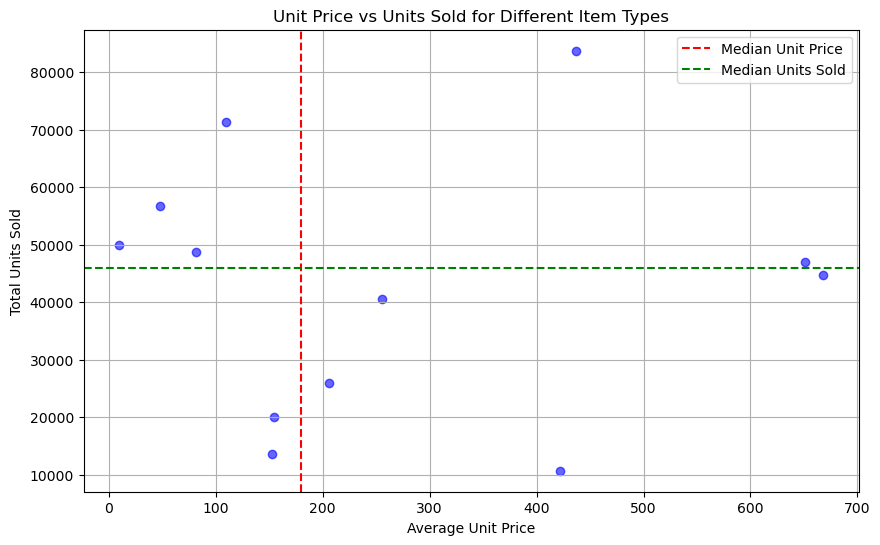

In [152]:
#Are there item types with high unit price but low sales volume?

item_sales = df.groupby('Item Type').agg({
    'Unit Price': 'mean',  # Average Unit Price
    'Units Sold': 'sum'    # Total Units Sold
}).reset_index()

# #You can now filter the item types where the average unit price is high and the total units sold are low. To define "high" and "low," you can use statistical measures like the mean or median, or define your own thresholds.
# For example, if you want to consider:
# High Unit Price: Greater than the median unit price.
# Low Sales Volume: Less than the median units sold.

# Calculate medians
median_unit_price = item_sales['Unit Price'].median()
median_units_sold = item_sales['Units Sold'].median()

# Filter for high unit price and low sales volume
high_price_low_sales = item_sales[(item_sales['Unit Price'] > median_unit_price) & 
                                  (item_sales['Units Sold'] < median_units_sold)]

print(high_price_low_sales)

# Scatter plot to visualize unit price vs units sold
plt.figure(figsize=(10, 6))
plt.scatter(item_sales['Unit Price'], item_sales['Units Sold'], color='b', alpha=0.6)
plt.axvline(median_unit_price, color='r', linestyle='--', label='Median Unit Price')
plt.axhline(median_units_sold, color='g', linestyle='--', label='Median Units Sold')
plt.title('Unit Price vs Units Sold for Different Item Types')
plt.xlabel('Average Unit Price')
plt.ylabel('Total Units Sold')
plt.legend()
plt.grid(True)
plt.show()

The result will show you the Item Types that have a higher-than-median unit price but lower-than-median sales volume, indicating that these items are priced higher but are selling fewer units.

There are 4 such items: Baby Food, Cereal, Household, and meat 

In [154]:
#Do customers tend to order more units in offline sales compared to online sales?
df.groupby('Sales Channel')['Units Sold'].sum().sort_values(ascending=False)

Sales Channel
Offline    276782
Online     236089
Name: Units Sold, dtype: int64

Offline is mostly preferred than online. 

In [155]:
# Is there a correlation between the sales channel and the types of products purchased?
contingency_table= pd.crosstab(df['Sales Channel'], df['Item Type'])
print(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

Item Type      Baby Food  Beverages  Cereal  Clothes  Cosmetics  Fruits  \
Sales Channel                                                             
Offline                3          6       3        6          7       2   
Online                 4          2       4        7          6       8   

Item Type      Household  Meat  Office Supplies  Personal Care  Snacks  \
Sales Channel                                                            
Offline                8     0                6              7       0   
Online                 1     2                6              3       3   

Item Type      Vegetables  
Sales Channel              
Offline                 2  
Online                  4  
Chi-Square Statistic: 18.750671550671548
P-Value: 0.06571851062650583


P-value is greater than 0.05, therefore there is not enough evidence to conclude that there is a relationship between sales channel and types of product purchased. 